In [1]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import sklearn.linear_model as sklin
import sklearn.metrics as met

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
original = heart

In [4]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Missing values check
heart.isna().sum().sum()

0

In [7]:
heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
#heart =  heart[heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })

In [9]:
#heart['Diabetic'] = heart['Diabetic'].astype(int)
#heart['Diabetic']

In [10]:
# Age catgory should not be categorical so making it continuous

newAgeCategory = {'55-59':57, '80 or older':80, '65-69':67,'75-79':77,'40-44':42,'70-74':72,'60-64':62,
                  '50-54':52,'45-49':47,'18-24':21,'35-39':37,'30-34':32,'25-29':27}
heart['AgeCategory'] = heart['AgeCategory'].apply(lambda x: newAgeCategory[x])
heart['AgeCategory'] = heart['AgeCategory'].astype('float')

Categorical Features:
HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Continuous Features:
BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

In [11]:
# Column stats for continuous data

heart.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')


,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [12]:
# Column stats for categorical data

fig = make_subplots(rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking","AlcoholDrinking","Stroke",
                    "DiffWalking", "Sex",'Race', 'Diabetic','PhysicalActivity','GenHealth','Asthma', 
                    'KidneyDisease','SkinCancer'),
specs=[[{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}]],)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(heart['HeartDisease'].value_counts().index),
                     values=[x for x in heart['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Smoking'].value_counts().index),
                     values=[x for x in heart['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['AlcoholDrinking'].value_counts().index),
                     values=[x for x in heart['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Stroke'].value_counts().index),
                     values=[x for x in heart['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['DiffWalking'].value_counts().index),
                     values=[x for x in heart['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Sex'].value_counts().index),
                     values=[x for x in heart['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Race'].value_counts().index),
                     values=[x for x in heart['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['PhysicalActivity'].value_counts().index),
                     values=[x for x in heart['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Diabetic'].value_counts().index),
                     values=[x for x in heart['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['GenHealth'].value_counts().index),
                     values=[x for x in heart['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Asthma'].value_counts().index),
                     values=[x for x in heart['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['KidneyDisease'].value_counts().index),
                     values=[x for x in heart['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['SkinCancer'].value_counts().index),
                     values=[x for x in heart['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=7, col=1)

fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

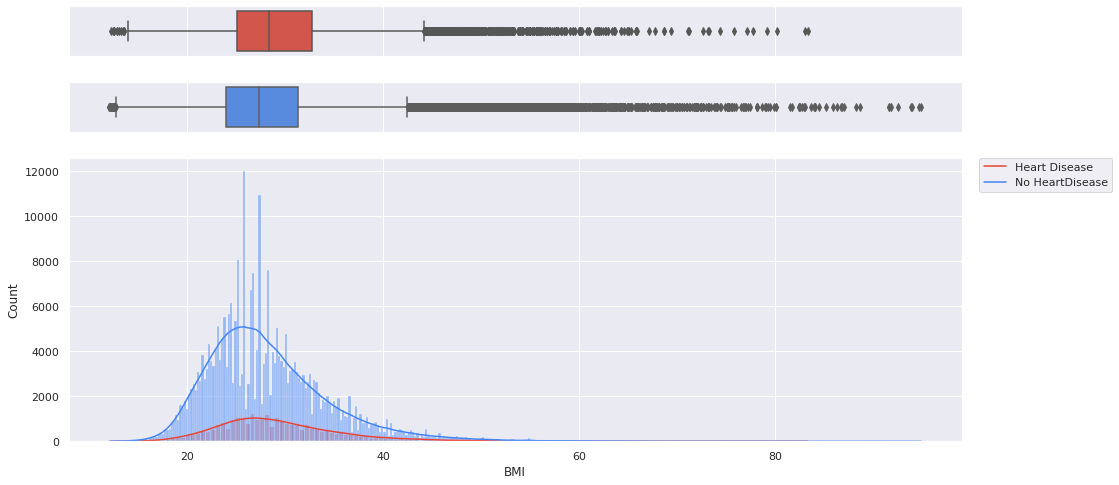

In [13]:
#Visualisation of continuous data

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=heart[heart['HeartDisease']=="Yes"]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(heart[heart['HeartDisease']=="Yes"], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=heart[heart['HeartDisease']=="No"]["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(heart[heart['HeartDisease']=="No"], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

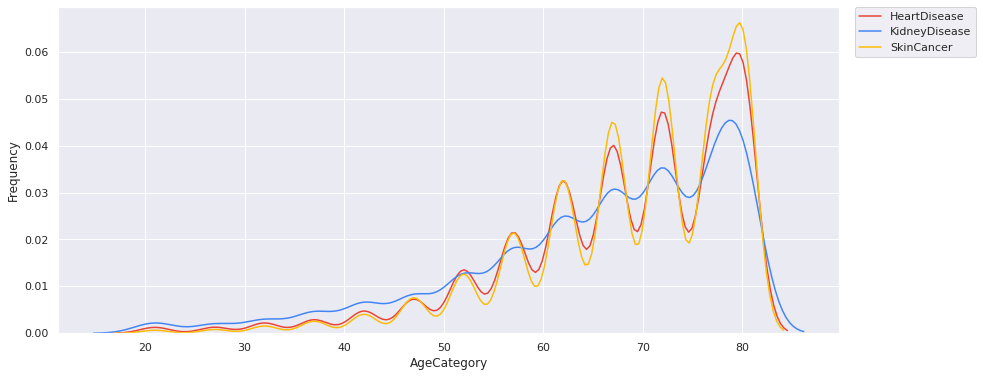

In [14]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(heart[heart["KidneyDisease"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(heart[heart["SkinCancer"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

People found to have heart disease, skin cancer and kidney disease are mostly old people

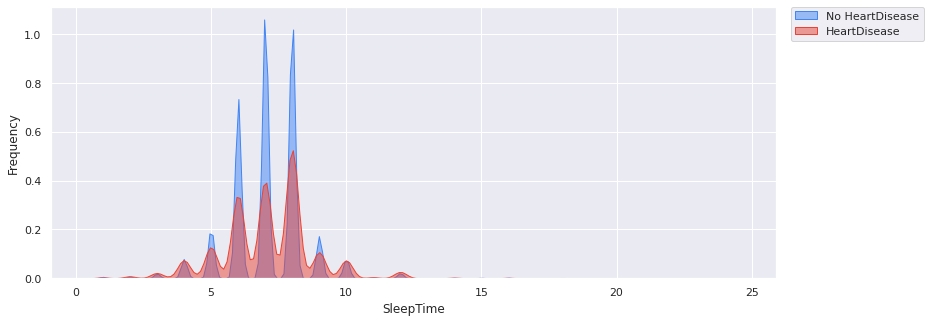

In [15]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

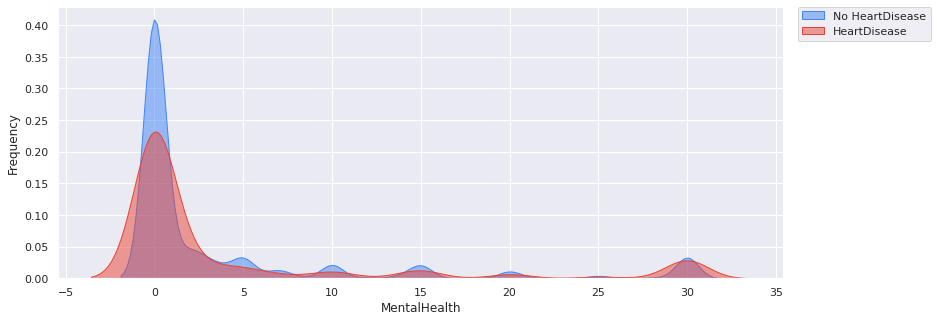

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["MentalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["MentalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

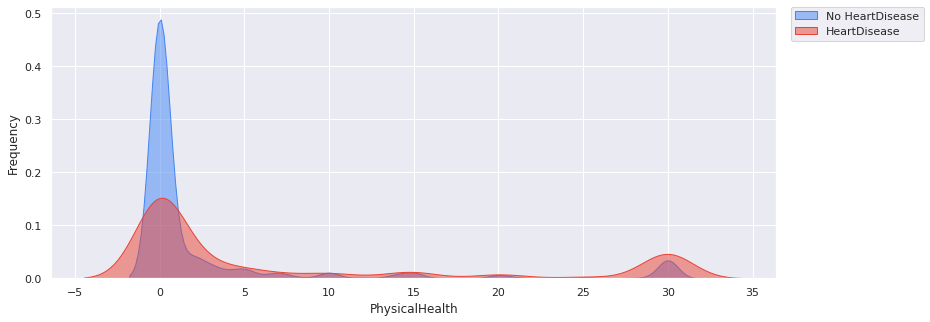

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

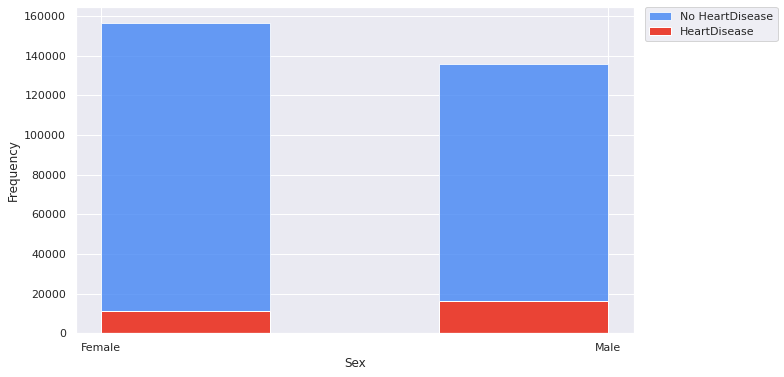

In [18]:
#Visualisation of Categorical data

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [19]:
female_with_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Sex']=="Female")])
num_female = len(heart[heart['Sex']=="Female"])
male_with_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Sex']=="Male")])
num_male = len(heart[heart['Sex']=="Male"])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738



1.   Most heart disease patients are Male than Females
2.   More Females were tested than males
3.   Males are approximately 1.6 times more likely to have heart disease than females





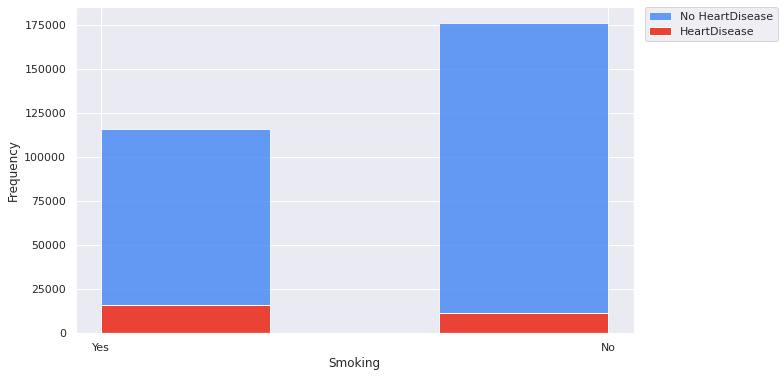

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [21]:
smoke_and_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Smoking']=="Yes")])
num_smoke = len(heart[heart['Smoking']=="Yes"])
no_smoke_and_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Smoking']=="No")])
num_no_smoke = len(heart[heart['Smoking']=="No"])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


1.   Most heart disease patients smoke
2.   People who smoke are approximately twice as likely to have heart disease than people who don't smoke.



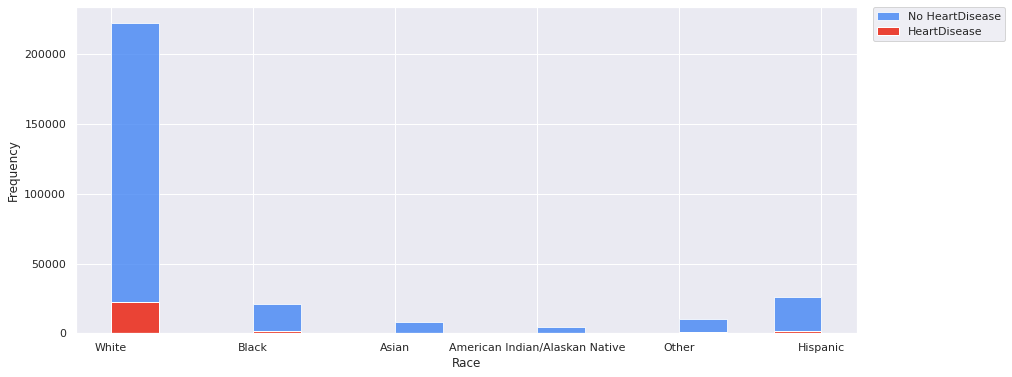

In [22]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most heart disease patients are white people.

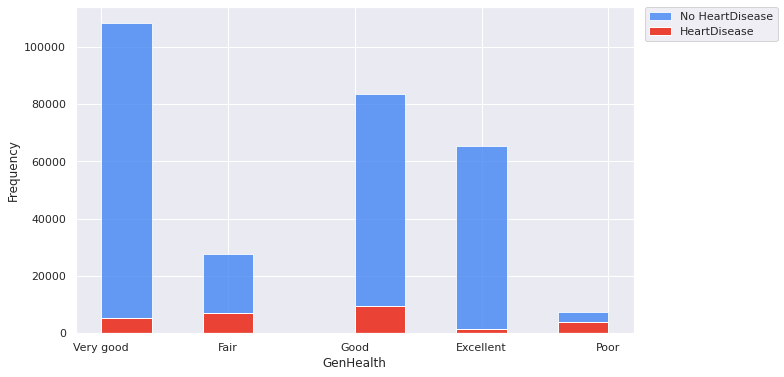

In [23]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

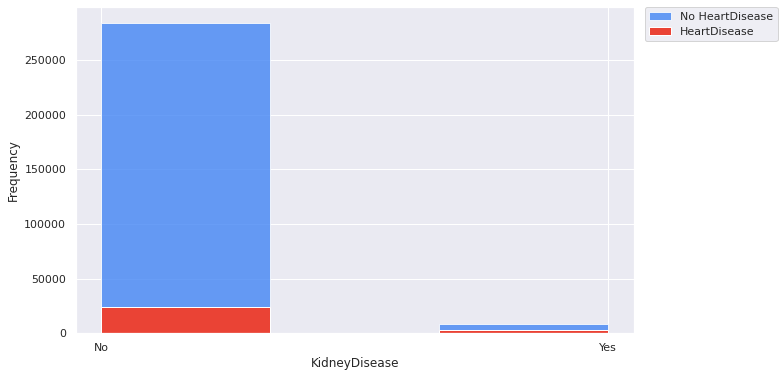

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most of the people tested have no kidney disease

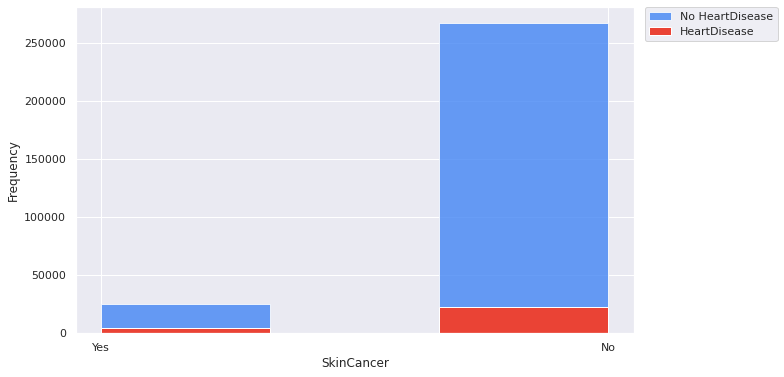

In [25]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

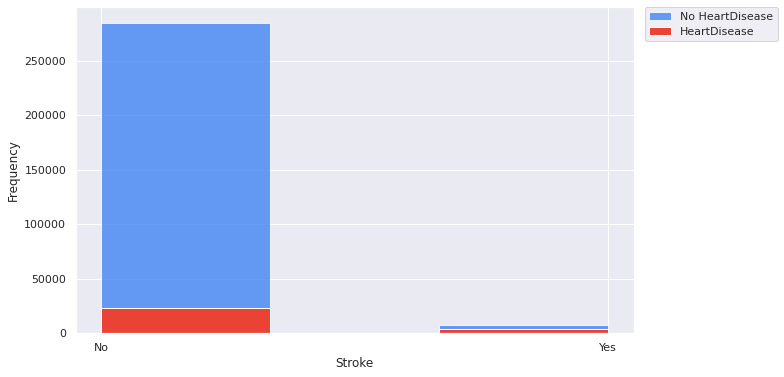

In [26]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

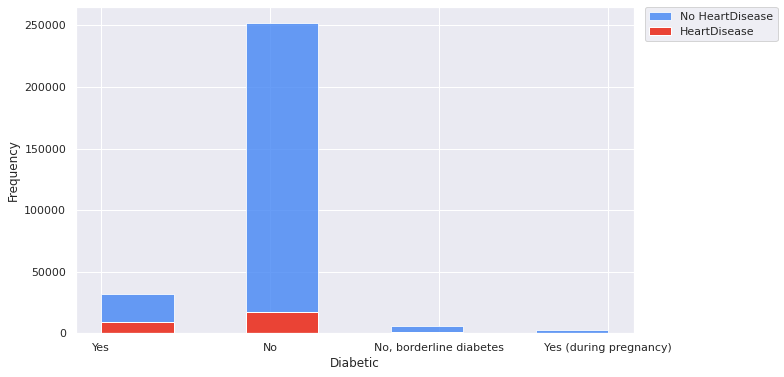

In [27]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Diabetic"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Diabetic"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

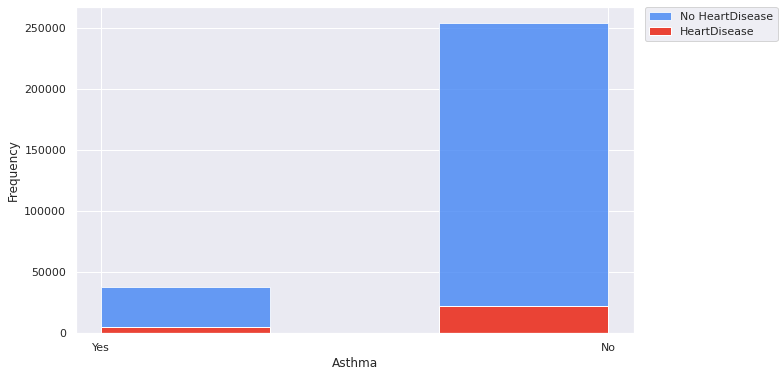

In [28]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Asthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

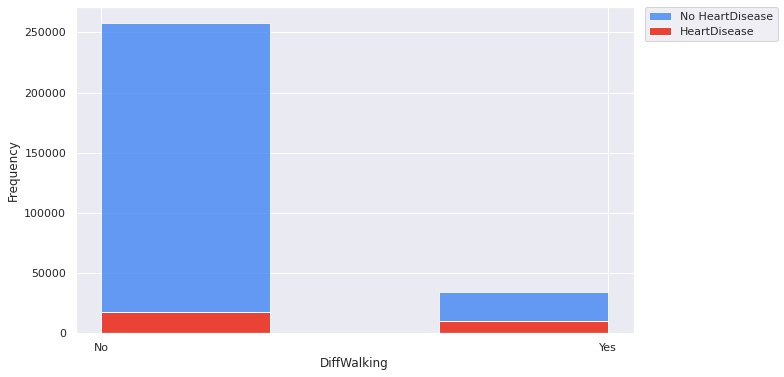

In [29]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

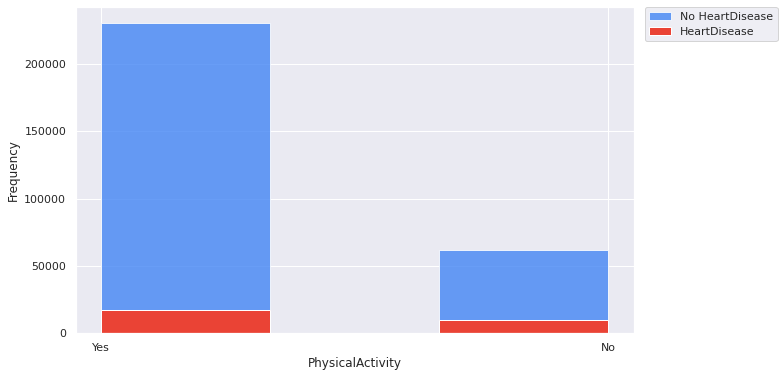

In [30]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

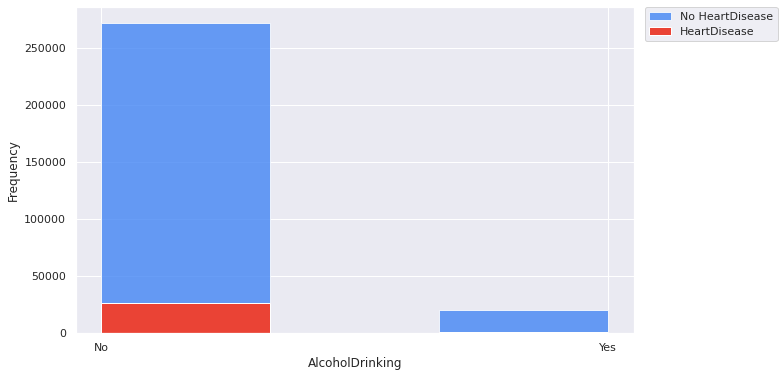

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [32]:
#heart =  heart[heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })

In [33]:
#heart['Diabetic'] = heart['Diabetic'].astype(int)
#heart['Diabetic']

In [34]:
print('Continuous Columns')
heart.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.325399,94.850000
PhysicalHealth,0.000000,3.371710,30.000000
MentalHealth,0.000000,3.898366,30.000000
AgeCategory,21.000000,54.355759,80.000000
SleepTime,1.000000,7.097075,24.000000


In [35]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
  heart[col] = heart[col]/heart[col].max()

In [36]:
print('\nCategorical Columns\n')
heart.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

In [37]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if heart[col].dtype == 'O':
        le = LabelEncoder()
        heart[col] = le.fit_transform(heart[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(heart, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [38]:
#Correlation

fig = px.imshow(heart[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

In [39]:
dummies = pd.get_dummies(heart[['AgeCategory', 'Race', 'Diabetic', 'GenHealth']],drop_first=True)
heart = heart.drop(['AgeCategory', 'Race', 'Diabetic', 'GenHealth'],axis=1)
heart = pd.concat([heart,dummies],axis=1)

In [40]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#Split dataset

X = heart.drop(columns = ['HeartDisease'])
y = heart['HeartDisease']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis = 1)

In [45]:
y_res.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [46]:
X = df_smote_over.drop(columns = ['HeartDisease'])
y = df_smote_over['HeartDisease']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [47]:
def evaluate_model(model, X_valid, y_valid):

    y_pred = model.predict(X_valid)

    # Calculate basics scores
    acc = met.accuracy_score(y_valid, y_pred)
    prec = met.precision_score(y_valid, y_pred)
    rec = met.recall_score(y_valid, y_pred)
    f1 = met.f1_score(y_valid, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_valid)[::,1]
    fpr, tpr, _ = met.roc_curve(y_valid, y_pred_proba)
    auc = met.roc_auc_score(y_valid, y_pred_proba)

    # confussion matrix
    cm = met.confusion_matrix(y_valid, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1 ,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [48]:
def print_model_result(model_dict):
    print('Accuracy:', model_dict['acc'])
    print('Precision:', model_dict['prec'])
    print('Recall:', model_dict['rec'])
    print('F1 Score:', model_dict['f1'])
    print('Area Under Curve:', model_dict['auc'])
    print('Confusion Matrix:\n', model_dict['cm'])

In [49]:
def draw_cm(title,cm):
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
    ax.set_title(f"Confusion Matrix of {title} Model")
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

# Model Training

Grid search

In [50]:
param_grid = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' :[0.07,0.05,0.01,0.005],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001]
}

In [51]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs= -1)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [52]:
gridsearch.best_params_

{'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 0.01}

In [53]:
gridsearch.best_score_

0.8097467709940634

In [54]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_split=0.01, random_state=1)

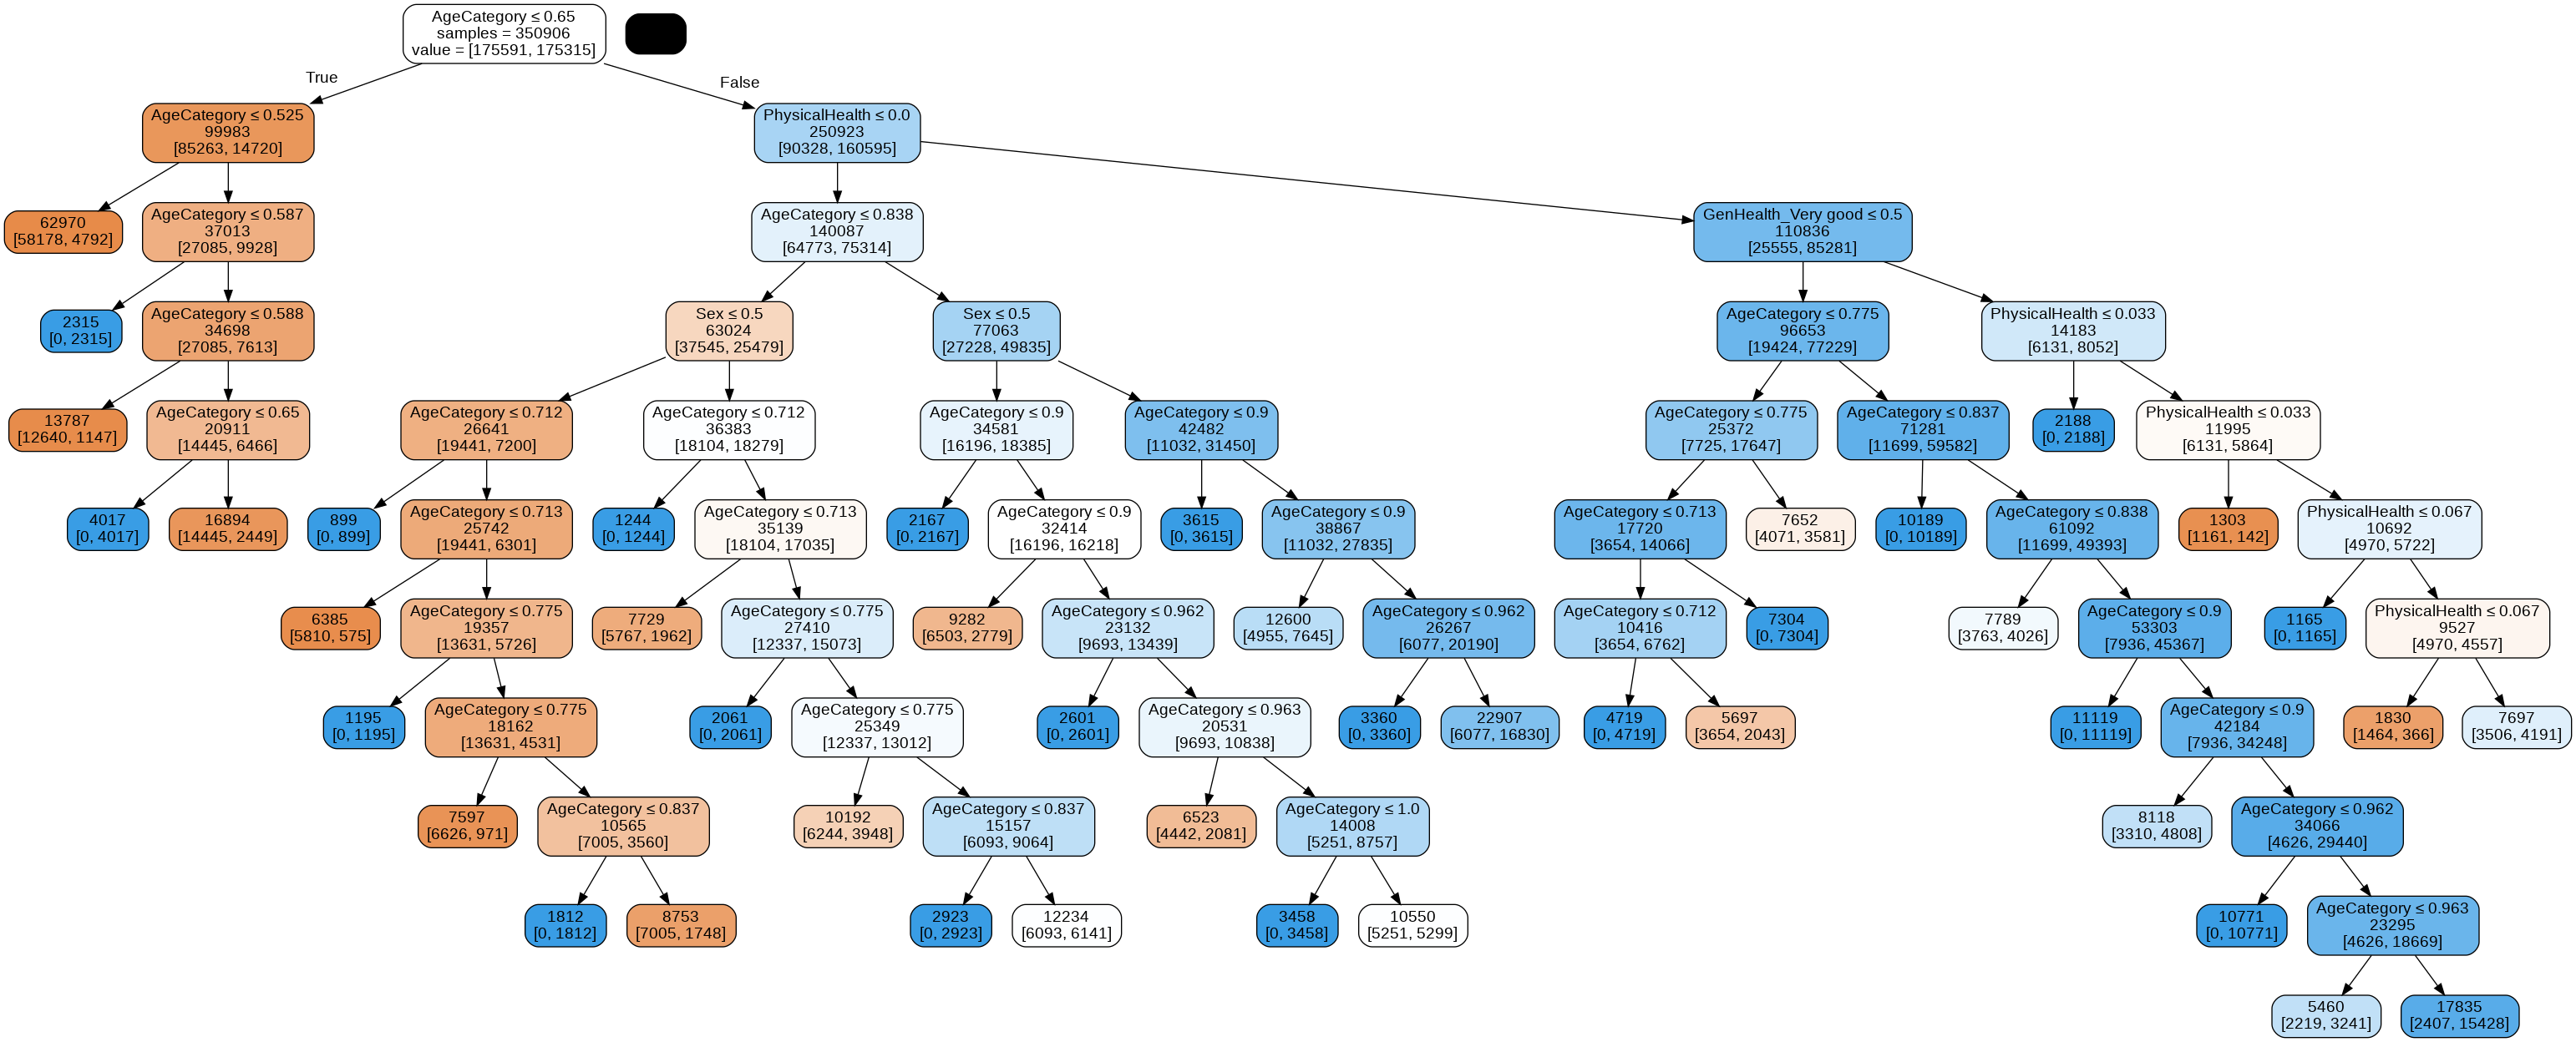

In [55]:
gridsearchtree = gridsearch.best_estimator_
plotDecisionTree(gridsearchtree, feature_names = X_train.columns)

In [56]:
regressionSummary(y_train, gridsearchtree.predict(X_train))


Regression statistics

               Mean Error (ME) : -0.0256
Root Mean Squared Error (RMSE) : 0.4342
     Mean Absolute Error (MAE) : 0.1886


In [57]:
regressionSummary(y_valid, gridsearchtree.predict(X_valid))


Regression statistics

               Mean Error (ME) : -0.0252
Root Mean Squared Error (RMSE) : 0.4325
     Mean Absolute Error (MAE) : 0.1870


In [58]:
classificationSummary(y_train, gridsearchtree.predict(X_train))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual      0      1
     0 138010  37581
     1  28584 146731


In [59]:
classificationSummary(y_valid, gridsearchtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8130)

       Prediction
Actual     0     1
     0 92002 24829
     1 18924 98183


Random forest

In [60]:
random_forest = RandomForestClassifier(random_state=1, n_estimators=500)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [61]:
importance = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis= 0)

**Calculating the importance of each variable for randomforest**

In [62]:
random_forest_df = pd.DataFrame({"feature" : X_train.columns,
                                 "importance" : importance,
                                 "Std" : std})
print(random_forest_df.sort_values("importance", ascending = False))

                             feature  importance       Std
13                       AgeCategory    0.286817  0.052090
0                                BMI    0.182437  0.005123
9                          SleepTime    0.138979  0.020963
4                     PhysicalHealth    0.077434  0.024123
5                       MentalHealth    0.050789  0.006052
6                        DiffWalking    0.031618  0.023939
20                      Diabetic_Yes    0.027975  0.017517
7                                Sex    0.023321  0.002525
22                    GenHealth_Fair    0.020681  0.011942
3                             Stroke    0.018405  0.009291
1                            Smoking    0.018004  0.005296
23                    GenHealth_Good    0.016156  0.004574
8                   PhysicalActivity    0.015296  0.003228
24                    GenHealth_Poor    0.013897  0.011526
25               GenHealth_Very good    0.012543  0.006467
12                        SkinCancer    0.011360  0.0024

In [63]:
classificationSummary(y_train, random_forest.predict(X_train))

Confusion Matrix (Accuracy 0.9985)

       Prediction
Actual      0      1
     0 175332    259
     1    257 175058


In [64]:
classificationSummary(y_valid, random_forest.predict(X_valid))

Confusion Matrix (Accuracy 0.9200)

       Prediction
Actual      0      1
     0 106900   9931
     1   8794 108313


Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [66]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [67]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                      coef
BMI                               0.784984
Smoking                           0.370586
AlcoholDrinking                  -0.494361
Stroke                            1.039995
PhysicalHealth                    0.087509
MentalHealth                      0.130238
DiffWalking                       0.209328
Sex                               0.722479
PhysicalActivity                 -0.031046
SleepTime                        -0.721561
Asthma                            0.275082
KidneyDisease                     0.414194
SkinCancer                        0.045557
AgeCategory                       5.267971
Race_Asian                       -0.860504
Race_Black                       -0.514394
Race_Hispanic                    -0.378614
Race_Other                       -0.285395
Race_White                       -0.387344
Diabetic_No, borderline diabetes -0.335998
Diabetic_Yes                      0.443877
Diabetic_Yes (during pregnancy)  -0.976448
GenHealth_F

In [68]:
logit_reg_prob = logit_reg.predict_proba(X_valid)

In [69]:
logit_reg_pred = logit_reg.predict(X_valid)

In [70]:
logit_result = pd.DataFrame({'actual' : y_valid,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
348389,1,0.674225,0.325775,0
296815,0,0.464427,0.535573,1
498134,1,0.549959,0.450041,0
538898,1,0.467675,0.532325,1
575047,1,0.085597,0.914403,1
...,...,...,...,...
477789,1,0.166636,0.833364,1
68364,0,0.342609,0.657391,1
248603,0,0.217977,0.782023,1
392711,1,0.676344,0.323656,0


In [71]:
classificationSummary(y_train, logit_reg.predict(X_train))

Confusion Matrix (Accuracy 0.7650)

       Prediction
Actual      0      1
     0 129632  45959
     1  36504 138811


In [72]:
classificationSummary(y_valid, logit_reg.predict(X_valid))

Confusion Matrix (Accuracy 0.7657)

       Prediction
Actual     0     1
     0 86364 30467
     1 24339 92768


Logistic Regression

In [73]:
model=sklin.LogisticRegression()

In [74]:
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
logistic_regression_result = evaluate_model(model, X_valid, y_valid)

In [76]:
print_model_result(logistic_regression_result)

Accuracy: 0.7657199770879464
Precision: 0.7527793556763775
Recall: 0.792138813222096
F1 Score: 0.7719577093830747
Area Under Curve: 0.8414418540801041
Confusion Matrix:
 [[86366 30465]
 [24342 92765]]


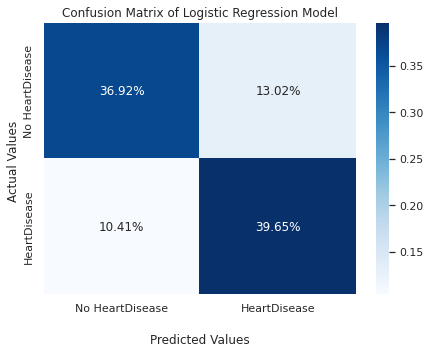

In [77]:
draw_cm("Logistic Regression",logistic_regression_result["cm"])

Accuracy - 76%

Decision Tree

In [78]:
#Decision Tree

model=tree.DecisionTreeClassifier()

In [79]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
dt_result = evaluate_model(model, X_valid, y_valid)

In [81]:
print_model_result(dt_result)

Accuracy: 0.8910950764732536
Precision: 0.8887700897781851
Recall: 0.8943786451706559
F1 Score: 0.8915655471519836
Area Under Curve: 0.8917678098860559
Confusion Matrix:
 [[103723  13108]
 [ 12369 104738]]


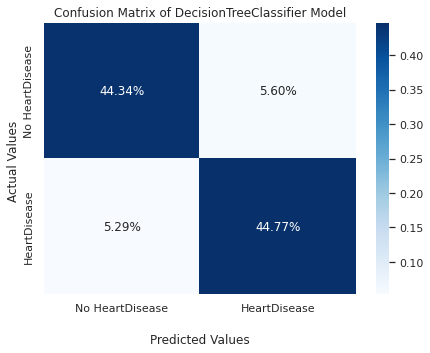

In [82]:
draw_cm("DecisionTreeClassifier",dt_result["cm"])

Accuracy - 89%

Random Forest

In [83]:
model=RandomForestClassifier()

In [84]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
rfc_result = evaluate_model(model, X_valid, y_valid)

In [86]:
print_model_result(rfc_result)

Accuracy: 0.9194743906505143
Precision: 0.916214178617716
Recall: 0.9235997848121803
F1 Score: 0.9198921576131792
Area Under Curve: 0.9696814367295973
Confusion Matrix:
 [[106940   9891]
 [  8947 108160]]


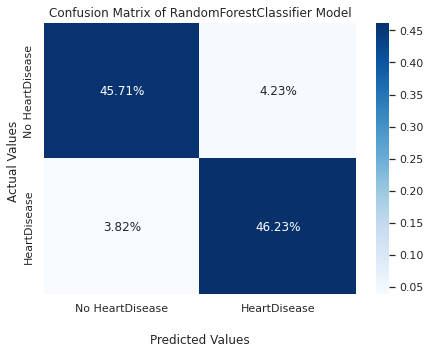

In [87]:
draw_cm("RandomForestClassifier",rfc_result["cm"])

Accuracy - 92%

XG Boost

In [88]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [89]:
model.fit(X_train, y_train)

XGBClassifier()

In [90]:
xgb_result = evaluate_model(model, X_valid, y_valid)

In [91]:
print_model_result(xgb_result)

Accuracy: 0.8710213817336218
Precision: 0.8803352991617521
Recall: 0.8591288308982383
F1 Score: 0.869602796973115
Area Under Curve: 0.9520035868653651
Confusion Matrix:
 [[103155  13676]
 [ 16497 100610]]


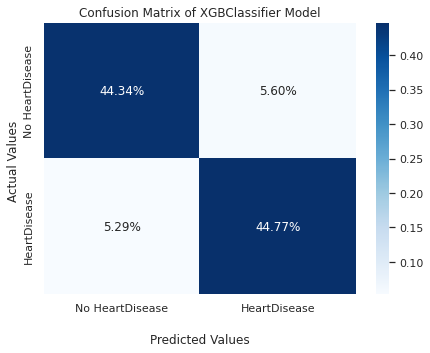

In [92]:
draw_cm("XGBClassifier",dt_result["cm"])

Accuracy - 87%

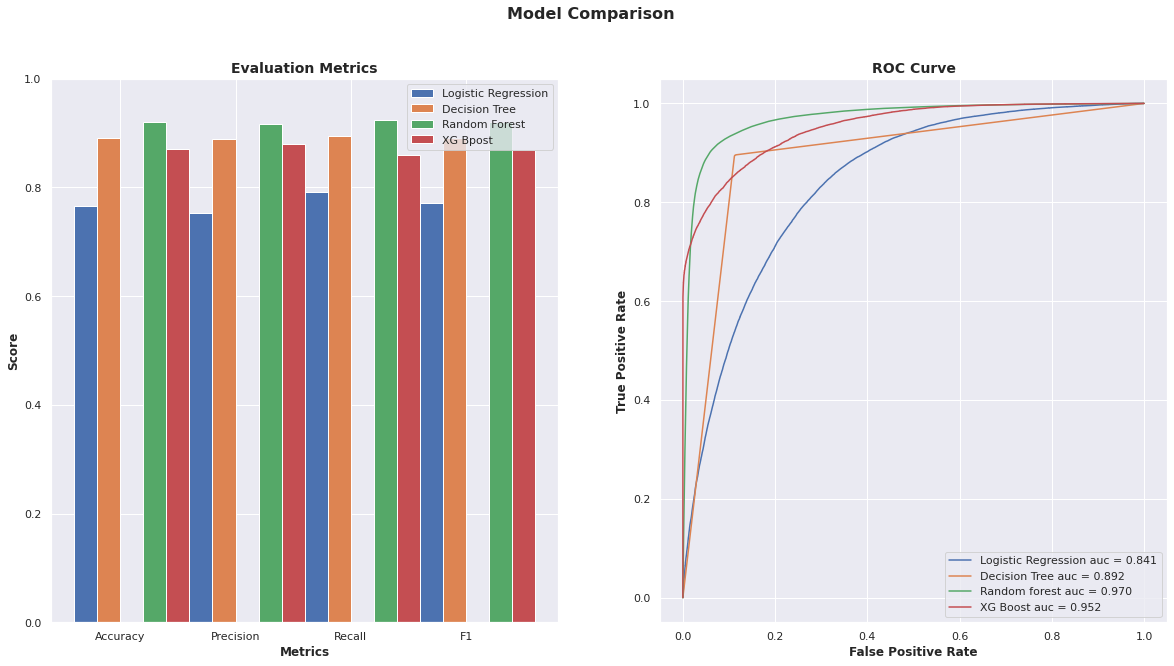

In [93]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
barWidth = 0.2
logistic_regression_result_score = [logistic_regression_result['acc'], logistic_regression_result['prec'], logistic_regression_result['rec'], logistic_regression_result['f1']]
dt_result_score = [dt_result['acc'], dt_result['prec'], dt_result['rec'], dt_result['f1']]
#knn_result_score = [knn_result['acc'], knn_result['prec'], knn_result['rec'], knn_result['f1']]
rfc_result_score = [rfc_result['acc'], rfc_result['prec'], rfc_result['rec'], rfc_result['f1']]
xgb_result_score = [xgb_result['acc'], xgb_result['prec'], xgb_result['rec'], xgb_result['f1']]

## Set position of bar on X axis
r1 = np.arange(len(logistic_regression_result_score))
r2 = [x + barWidth for x in r1]
#r3 = [x + 2*barWidth for x in r1]
r4 = [x + 3*barWidth for x in r1]
r5 = [x + 4*barWidth for x in r1]

## Make the plot
ax1.bar(r1, logistic_regression_result_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dt_result_score, width=barWidth, edgecolor='white', label='Decision Tree')
#ax1.bar(r3, knn_result_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, rfc_result_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, xgb_result_score, width=barWidth, edgecolor='white', label='XG Bpost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(logistic_regression_result_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(logistic_regression_result['fpr'], logistic_regression_result['tpr'], label='Logistic Regression auc = {:0.3f}'.format(logistic_regression_result['auc']))
ax2.plot(dt_result['fpr'], dt_result['tpr'], label='Decision Tree auc = {:0.3f}'.format(dt_result['auc']))
#ax2.plot(knn_result['fpr'], knn_result['tpr'], label='K-Nearest Nieghbor auc = {:0.3f}'.format(knn_result['auc']))
ax2.plot(rfc_result['fpr'], rfc_result['tpr'], label='Random forest auc = {:0.3f}'.format(rfc_result['auc']))
ax2.plot(xgb_result['fpr'], xgb_result['tpr'], label='XG Boost auc = {:0.3f}'.format(xgb_result['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [ ]:
#Random forest is the best model.